We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-19 16:05:41--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.89, 13.227.223.117, 13.227.223.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128562 (1.1M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>]   1.08M  5.64MB/s    in 0.2s    

2020-06-19 16:05:41 (5.64 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [1128562/1128562]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-06-19   19      6  2020    658    42.0             Afghanistan    AF   
1 2020-06-18   18      6  2020    564    13.0             Afghanistan    AF   
2 2020-06-17   17      6  2020    783    13.0             Afghanistan    AF   
3 2020-06-16   16      6  2020    761     7.0             Afghanistan    AF   
4 2020-06-15   15      6  2020    664    20.0             Afghanistan    AF   
5 2020-06-14   14      6  2020    556     5.0             Afghanistan    AF   
6 2020-06-13   13      6  2020    656    20.0             Afghanistan    AF   
7 2020-06-12   12      6  2020    747    21.0             Afghanistan    AF   
8 2020-06-11   11      6  2020    684    21.0             Afghanistan    AF   
9 2020-06-10   10      6  2020    542    15.0             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  
0                  AFG     38041757         Asia  
1                  AFG     38041757         Asia  
2                  AFG     38041757         Asia  
3                  AFG     38041757         Asia  
4                  AFG     38041757         Asia  
5                  AFG     38041757         Asia  
6                  AFG     38041757         Asia  
7                  AFG     38041757         Asia  
8                  AFG     38041757         Asia  
9                  AFG     38041757         Asia

Last check of our source dataframe.

In [4]:
df.count()

dateRep                    24138
day                        24138
month                      24138
year                       24138
cases                      24138
deaths                     24137
countriesAndTerritories    24138
geoId                      24138
countryterritoryCode       24138
popData2019                24138
continentExp               24138
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                           \
geoId         AD     AE     AF   AG   AI    AL     AM    AO      AR    AT   
dateRep                                                                     
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0   NaN     NaN   0.0   
...          ...    ...    ...  ...  ...   ...    ...   ...     ...   ...   
2020-06-15   0.0  394.0  664.0  0.0  0.0  57.0  663.0   2.0  1282.0  24.0   
2020-06-16   0.0  342.0  761.0  0.0  0.0  69.0  397.0   2.0  1208.0  27.0   
2020-06-17   1.0  346.0  783.0  0.0  0.0  82.0  425.0   0.0  1374.0  33.0   
2020-06-18   0.0  382.0  564.0  0.0  0.0  50.0  544.0  13.0  1393.0  17.0   
2020-06-19   1.0  388.0  658.0  0.0  0.0  66.0  665.0   0.0     0.0  40.0   

            ... deaths                                                 
geoId       ...     VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep     ...                                                        
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...         ...    ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-06-15  ...    0.0  1.0  0.0  0.0  0.0  0.0   4.0  57.0  1.0  0.0  
2020-06-16  ...    0.0  1.0  0.0  0.0  0.0  1.0  44.0  88.0  0.0  0.0  
2020-06-17  ...    0.0  1.0  0.0  0.0  0.0  0.0   7.0  57.0  0.0  0.0  
2020-06-18  ...    0.0  NaN  0.0  0.0  0.0  0.0  29.0  49.0  0.0  0.0  
2020-06-19  ...    0.0  1.0  0.0  0.0  0.0  0.0   4.0  63.0  0.0  0.0  

[172 rows x 412 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 412 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Let's start with __IT__, because Italy is already showing a longer tail in the case data. We create a simple dataframe to contain the source values for our fitting algorithm and then expand the data into a one-dimensional vector by repeating the x values by the number of cases for that day. Now the histogram of that data should be our original curve.

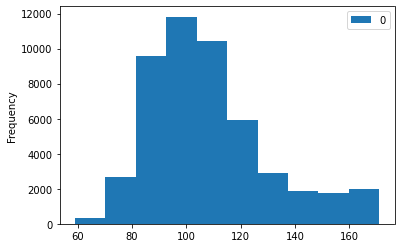

In [23]:
country = 'NL'
measure = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
df_pred = df_pred[df_pred['y'] > 0]
ft_data = np.array(df_pred.astype(int))
xp_data = np.repeat(ft_data[:, 0], ft_data[:, 1])
pd.DataFrame(xp_data).plot(kind='hist')

Now we can use statistical fitting to estimate the curve. From various epidemiological papers the gamma function seems to be a good approximation. It is available in the `scipy` package. A Gamma distribution is described by three parameters and we can use `stats` to get the 4 moments of the distribution.

In [24]:
import scipy.stats as stats

alpha, loc, scale = stats.gamma.fit(xp_data)
print(alpha, loc, scale, len(xp_data))

mean, var, skew, kurt = stats.gamma.stats(alpha, loc, scale, 'mvsk')
print(mean, var, skew, kurt)

5.319102570973195 58.723948613258166 9.25564604993464 49319
107.95567931348342 455.6714737869857 0.86718311502429 1.1280098324748467


The `pdf` function takes the results of `fit` and applies them to input data.

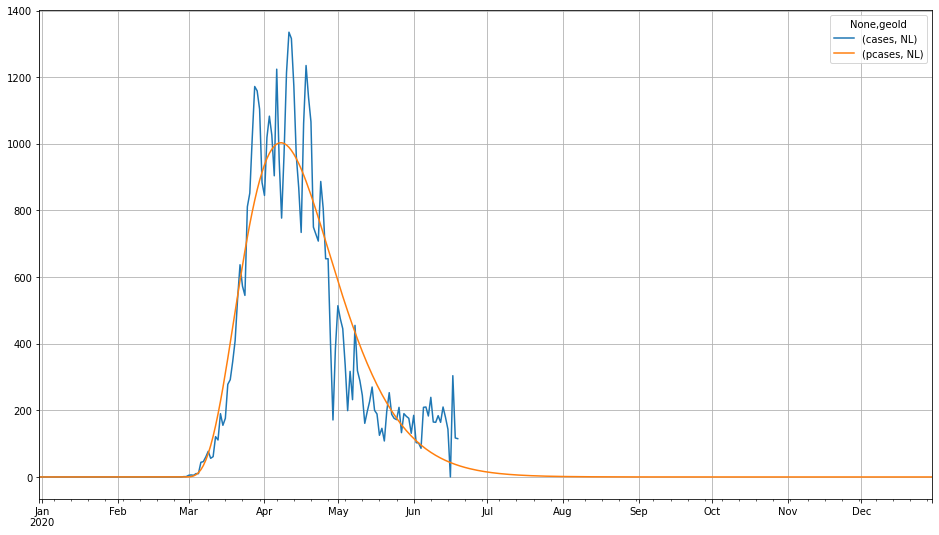

In [25]:
df_geo[(pmeasure, country)] = stats.gamma.pdf(df_geo['daynum'], alpha, loc, scale) * len(xp_data)
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

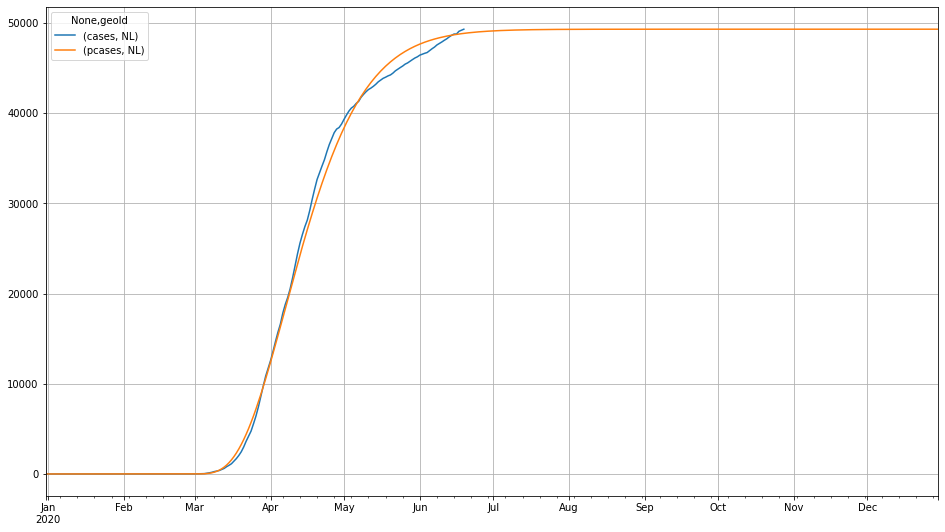

In [26]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.